# **Laboratorio 9: Airflow 🛫**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Esteban Araneda
- Nombre de alumno 2: Ignacio Reyes

### **Link de repositorio de GitHub:** [Repositorio grupo OVNI](https://github.com/estebanaraneda/MDS7202_OVNI/)

## Temas a tratar

- Construcción de pipelines productivos usando `Airflow`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Reconocer los componentes pricipales de `Airflow` y su funcionamiento.
- Poner en práctica la construcción de pipelines de `Airflow`.
- Automatizar procesos típicos de un proyecto de ciencia de datos mediante `Airflow` y `Docker`.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://media.tenor.com/OBQ6niqbxswAAAAM/legallyblonde.gif" width="300">
</p>

Vale, una estudiante del Magíster en Ciencia de Datos, se encuentra en la etapa final de sus estudios. Por un lado, está muy contenta por haber llegado tan lejos, pero por otro, no puede evitar sentirse inquieta. Desde que ingresó a la universidad, una pregunta la ha perseguido: ¿qué tan probable es que pueda ser seleccionada en los lugares donde envíe postulaciones para puestos de trabajo?

Esta duda la mantiene en constante reflexión, especialmente porque sabe que el mercado laboral en Ciencia de Datos es competitivo y exige habilidades no solo técnicas, sino también estratégicas para destacar. Sin embargo, Vale actualmente está completamente enfocada en terminar su tesis de magíster y ha tenido que postergar cualquier preparación específica para enfrentar el desafío de las postulaciones laborales.

Al ver el avance y las habilidades que usted ha demostrado en el curso, Vale decidió proponerle un desafío que le permitirá disminuir la incertidumbre sobre su futuro laboral. Inspirado en sus conocimientos, recolectó un conjunto de datos que contiene información sobre diversos factores que influyen en las decisiones de contratación de empresas al seleccionar entre sus postulantes. Este set de datos incluye los siguientes atributos:

- Age: Edad del candidato
- Gender: Genero del candidato. Male (0), Female (1).
- EducationLevel: Mayor nivel educacional alcanzado por el candidato. Licenciatura Tipo 1 (1), Licenciatura Tipo 2 (2), Maestría (3), PhD. (4).
- ExperienceYears: Años de experiencia profesional.
- PreviousCompanies: Numero de compañías donde el candidato ha trabajado anteriormente.
- DistanceFromCompany: Distancia en kilometros entre la residencia del candidato y la compañía donde postula.
- InterviewScore: Puntaje obtenido en la entrevista por el candidato entre 0 a 100.
- SkillScore: Puntaje obtenido en evaluación de habilidades técnicas por el candidato, entre 0 a 100.
- PersonalityScore: Puntaje obtenido en pruebas de personalidad del candidato, entre 0 a 100.
- RecruitmentStrategy: Estrategia del equipo de reclutamiento. Agresiva (1), Moderada (2), Conservadora (3).

Variable a predecir:
- HiringDecision: Resultado de la postulación. No contratado (0), Contratado (1).

Su objetivo será ayudar a Vale a desarrollar un modelo que le permita predecir, basado en estos factores, si un postulante será contratado o no. Esta herramienta no solo le dará a Vale mayor claridad sobre el impacto de ciertos atributos en la decisión final de contratación, sino que también le permitirá aplicar sus conocimientos de Ciencia de Datos para resolver una pregunta que a muchos estudiantes como a ella les inquieta.

Como estudiante del curso Laboratorio de Programación Científica para Ciencia de Datos, deberá demostrar sus capacidades para preprocesar, analizar y modelar datos, brindándole a Vale una solución robusta y bien fundamentada para su problemática.

`Nota:` El siguiente [enlace](https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data/data) contiene el set de datos original.

# **1. Pipeline de Predicción Lineal** (30 Puntos)

<p align="center">
  <img src="https://media.licdn.com/dms/image/v2/D4E22AQHZplrdPyKnvA/feedshare-shrink_2048_1536/feedshare-shrink_2048_1536/0/1713736729086?e=2147483647&v=beta&t=Tad2ulaWkhhDrPRN0PCdXrfuza60PjoJqgLborDyLao" width="500">
</p>

En esta sección buscaremos desplegar un producto utilizando un modelo de clasificación `Random Forest` para determinar **si una persona será contratada o no en un proceso de selección**. Para ello, comenzaremos preparando un pipeline lineal mediante `Airflow`.

## **1.1 Preparando el Pipeline** (15 puntos)

**Primero, asegúrese de tener creada las carpetas `dags`, `plugins` y `logs`**.

Comenzamos preparando un archivo llamado `hiring_functions.py`, el cual guardará en la carpeta `dags` y debe contener lo siguiente:

1. (3 puntos) Una función llamada `create_folders()` que cree una carpeta, la cual utilice la fecha de ejecución como nombre. Adicionalmente, dentro de esta carpeta debe crear las siguientes subcarpetas:
  - raw
  - splits
  - models

  `Hint`: Puede hacer uso de kwargs para obtener la fecha de ejecución mediante el DAG. El siguiente [Enlace](https://airflow.apache.org/docs/apache-airflow/stable/templates-ref.html) le puede ser útil.

2. (3 puntos) Una función llamada `split_data()` que lea el archivo `data_1.csv` de la carepta `raw` y a partir de este, aplique un *hold out*, generando un dataset de entrenamiento y uno de prueba. Luego debe guardar estos nuevos conjuntos de datos en la carpeta `splits`. `Nota:` Utilice un 20% para el conjunto de prueba, mantenga la proporción original en la variable objetivo y fije una semilla.

3. (8 puntos) Cree una función llamada `preprocess_and_train()` que:
  - Lea los set de entrenamiento y prueba de la carpeta `splits`.
  - Cree y aplique un `Pipeline` con una etapa de preprocesamiento. Utilice `ColumnTransformers` para aplicar las transformaciones que estime convenientes. Puede apoyarse del archivo `data_1_report.html` para justificar cualquier paso del preprocesamiento.
  
  - Añada una etapa de entrenamiento utilizando el modelo `RandomForest`.
  
  Esta función **debe crear un archivo `joblib` (análogo a `pickle`) con el pipeline entrenado** en la carepta `models`, además debe **imprimir** el accuracy en el conjunto de prueba y el f1-score de la clase positiva (contratado).
3. (1 punto) Incorpore la función `gradio_interface` en su script, modificando la ruta de acceso a su modelo, de forma que pueda leerlo desde la carepta `models`. Puede realizar las modificaciones que estime necesarias.

`NOTA:` Se permite la creación de funciones auxiliares si lo estiman conveniente.

In [ ]:
#Inserte su código aqui

In [ ]:

def predict(file,model_path):

    pipeline = joblib.load(model_path)
    input_data = pd.read_json(file)
    predictions = pipeline.predict(input_data)
    print(f'La prediccion es: {predictions}')
    labels = ["No contratado" if pred == 0 else "Contratado" for pred in predictions]

    return {'Predicción': labels[0]}


def gradio_interface():

    model_path= ... #Completar con la ruta del modelo entrenado

    interface = gr.Interface(
        fn=lambda file: predict(file, model_path),
        inputs=gr.File(label="Sube un archivo JSON"),
        outputs="json",
        title="Hiring Decision Prediction",
        description="Sube un archivo JSON con las características de entrada para predecir si Vale será contratada o no."
    )
    interface.launch(share=True)

## **1.2 Creando Nuestro DAG** (15 puntos)

<p align="center">
  <img src="https://media.tenor.com/a_yibuZQgngAAAAM/elle-woods.gif" width="400">
</p>

Con las funciones del pipeline ya creadas, ahora vamos a proceder a crear un Directed Acyclic Graph (DAG). Para ello, se le pide lo siguiente:

- (10 puntos) Cree un segundo archivo llamado `dag_lineal.py` y guardelo en la carpeta dags. Este script debe seguir la siguiente estructura (Ver imagen de referencia):

    0. Inicialice un DAG con fecha de inicio el 1 de octubre de 2024, ejecución manual y **sin backfill**. Asigne un `dag_id` que pueda reconocer facilmente, como `hiring_lineal`, etc.
    1. Debe comenzar con un marcador de posición que indique el inicio del pipeline.
    2. Cree una carpeta correspondiente a la ejecución del pipeline y cree las subcarpetas `raw`, `splits` y `models` mediante la función `create_folders()`.
    3. Debe descargar el archivo `data_1.csv` del siguiente [enlace](https://gitlab.com/eduardomoyab/laboratorio-13/-/raw/main/files/data_1.csv). Debe guardar el archivo en la carpeta raw de la ejecución correspondiente.`Hint:` Le puede ser útil el comando `curl -o <path de guardado> <enlace con los datos>`.
    4. Debe aplicar un hold out mediante la función `split_data()` de su archivo creado en la subsección anterior.
    5. Debe aplicar el preprocesamiento y el entrenamiento del modelo mediante la función `preprocess_and_train()`.
    6. Finalmente, debe montar una interfaz en gradio donde pueda cargar un archivo ``json``.


- (3 puntos) Cree un `DockerFile` para montar un contenedor que contenga Airflow. Adicionalmente, cree una carpeta llamada dags donde guardará el script.py creado anteriormente.

    `Nota:` Para la imagen, se recomienda utilizar python 3.10-slim. Adicionalmente, puede instalar `curl` mediante la siguiente linea de código: `RUN apt-get update && apt-get install -y curl`.

- Construya el contenedor en Docker y acceda a la aplicación web de Airflow mediante el siguiente [enlace](http://localhost:8080/). Inicie sesión, acceda al DAG creado y ejecute de forma manual su pipeline.

- (2 puntos) Acceda a la URL pública de Gradio e ingrese el archivo `vale_data.json` a su modelo. ¿Que predicción entregó el modelo para Vale? Adjunte imágenes de su resultado. `Hint:` Puede acceder a los `logs` para obtener los prints y la URL pública.

`Hint:` Recuerde que puede entregar `kwargs` a sus funciones, como por ejemplo la fecha de ejecución `ds`.

**Para esta sección, debe adjuntar todos los scripts creados junto a su notebook en la entrega, ya que serán ejecutados para validar el funcionamiento. Para justificar sus respuestas, adicionaslmente puede utilizar imágenes de apoyo, como screenshots.**

DAG de referencia:
<p align="center">
  <img src="https://drive.google.com/uc?id=1iwDgECZfFeWq1dl433tMa6_3CNF9cn1L" width="1200">
</p>




In [ ]:
#Inserte código aqui

# **2. Paralelizando el Pipeline** (30 puntos)

<p align="center">
  <img src="https://i.gifer.com/8LNL.gif" width="400">
</p>



Al ver los resultados obtenidos, Vale queda muy contenta con el clasificador. Sin embargo, le aparecen algunas dudas respecto al funcionamiento del pipeline. Primero le comenta que es posible que en un futuro tenga nuevos datos que podrían ser útiles para realizar nuevos entrenamientos, por lo que sería ideal si este pipeline se fuera ejecutando de forma periódica y **NO** de forma manual. Además, Vale le menciona que le gustaría explorar el desempeño de otros modelos además de `Random Forest`, de forma que el pipeline seleccione de forma automática el modelo con mejor desempeño para luego hacer la predicción de Vale.

## **2.1 Preparando un Nuevo Pipeline** (15 puntos)

<p align="center">
  <img src="https://media.tenor.com/gnA7-5TewXMAAAAM/elle-woods.gif" width="400">
</p>

De acuerdo a lo que le comentó Vale, usted decide crear un nuevo script con las funciones que utilizará su pipeline. Por ende, dentro de la carpeta `dags`, usted creará el archivo `hiring_dynamic_functions.py` el cual debe contener:

1. (2 puntos) Una función llamada `create_folders()` que cree una carpeta, la cual utilice la fecha de ejecución como nombre. Adicionalmente, dentro de esta carpeta debe crear las siguientes subcarpetas:
  - raw
  - preprocessed
  - splits
  - models
2. (2 puntos) Una función llamada `load_ands_merge()` que lea desde la carpeta `raw` los archivos `data_1.csv`y `data_2.csv` en caso de estar disponible. Luego concatene estos y genere un nuevo archivo resultante, guardándolo en la carpeta `preprocessed`.

3. (2 puntos) Una función llamada `split_data()` que lea la data guardada en la carpeta `preprocessed` y realice un hold out sobre esta data. Esta función debe crear un conjunto de entrenamiento y uno de prueba. Mantenga una semilla y 20% para el conjunto de prueba. Guarde los conjuntos resultantes en la carpeta `splits`.

4. (6 puntos) Una función llamada `train_model()` que reciba un modelo de clasificación.
    - La función debe comenzar leyendo el conjunto de entrenamiento desde la carpeta `spits`.
    - Esta debe crear y aplicar un `Pipeline` con una etapa de preprocesamiento. Utilice `ColumnTransformers` para aplicar las transformaciones que estime convenientes.
    - Añada una etapa de entrenamiento utilizando un modelo que ingrese a la función.
  
  Esta función **debe crear un archivo joblib con el pipeline entrenado**. Guarde el modelo con un nombre que le permita una facil identificación dentro de la carpeta `models`.

5. (3 puntos) Una función llamada `evaluate_models()` que reciba sus modelos entrenados desde la carpeta `models`, evalúe su desempeño mediante `accuracy` en el conjunto de prueba y seleccione el mejor modelo obtenido. Luego guarde el mejor modelo como archivo `.joblib`. Su función debe imprimir el nombre del modelo seleccionado y el accuracy obtenido.

In [ ]:
#Inserte código aqui

## **2.2 Componiendo un nuevo DAG** (15 puntos)

<p align="center">
  <img src="https://67.media.tumblr.com/bfa5208006dc3f404ec08e8c3195cf2c/tumblr_obg9tgnLfX1u9e9f2o2_r1_500.gif" width="500">
</p>

Con las nuevas funciones, se debe crear el nuevo nuevo DAG. Para ello, cree un nuevo script en la carpeta `dags`, llamandolo `dag_dynamic.py`. Este script debe contener la siguiente estructura:

1. (1 punto) Inicialice un DAG con fecha de inicio el 1 de octubre de 2024, el cual se debe ejecutar el día 5 de cada mes a las 15:00 UTC. Utilice un `dag_id` interpretable para identificar fácilmente. **Habilite el backfill** para que pueda ejecutar tareas programadas desde fechas pasadas.
2. (1 punto) Comience con un marcador de posición que indique el inicio del pipeline.
3. (2 puntos) Cree una carpeta correspondiente a la ejecución del pipeline y cree las subcarpetas `raw`, `preprocessed`, `splits` y `models` mediante la función `create_folders()`.
4. (2 puntos) Implemente un `Branching`que siga la siguiente lógica:
  - Fechas previas al 1 de noviembre de 2024: Se descarga solo `data_1.csv`
  - Desde el 1 de noviembre del 2024: descarga `data_1.csv` y `data_2.csv`.
  En el siguiente [enlace](https://gitlab.com/eduardomoyab/laboratorio-13/-/raw/main/files/data_2.csv) puede descargar `data_2.csv`.
5. (1 punto) Cree una tarea que concatene los datasets disponibles mediante la función `load_and_merge()`. Configure un `Trigger` para que la tarea se ejecute si encuentra disponible **como mínimo** uno de los archivos.
6. (1 punto) Aplique el hold out al dataset mediante la función `split_data()`, obteniendo un conjunto de entrenamiento y uno de prueba.
7. (2 puntos) Realice 3 entrenamientos en paralelo:
  - Un modelo Random Forest.
  - 2 modelos a elección.
  Asegúrese de guardar sus modelos entrenados con nombres distintivos. Utilice su función `train_model()` para ello.
8. (2 puntos) Mediante la función `evaluate_models()`, evalúe los modelos entrenados, registrando el accuracy de cada modelo en el set de prueba. Luego debe imprimir el mejor modelo seleccionado y su respectiva métrica. Configure un `Trigger` para que la tarea se ejecute solamente si los 3 modelos fueron entrenados y guardados.

`Hint:` Recuerde que puede entregar `kwargs` a sus funciones, como por ejemplo la fecha de ejecución `ds`.

Una vez creado el script, vuelva a construir el contenedor en Docker, acceda a la aplicación web de Airflow, ejecute su pipeline y muestre sus resultados. Adjunte imágenes que ayuden a mostrar el proceso y sus resultados.

Adicionalmente, responda (1 c/u):

- ¿Cual es el accuracy de cada modelo en la ejecución de octubre? ¿Se obtienen los mismos resultados a partir de Noviembre?
- Analice como afectó el añadir datos a sus modelos mediante el desempeño del modelo y en costo computacional.
- Muestre el esquema de su DAG ejecutado en octubre y en noviembre.


`Nota:` Para esta sección no debe implementar la tarea en gradio, solamente se espera determinar el mejor modelo y comparar el desempeño obtenido.

**IMPORTANTE: Para esta sección, debe adjuntar todos los scripts creados junto a su notebook en la entrega, ya que serán ejecutados para validar el funcionamiento. Para justificar sus respuestas, adicionaslmente puede utilizar imágenes de apoyo, como screenshots.**

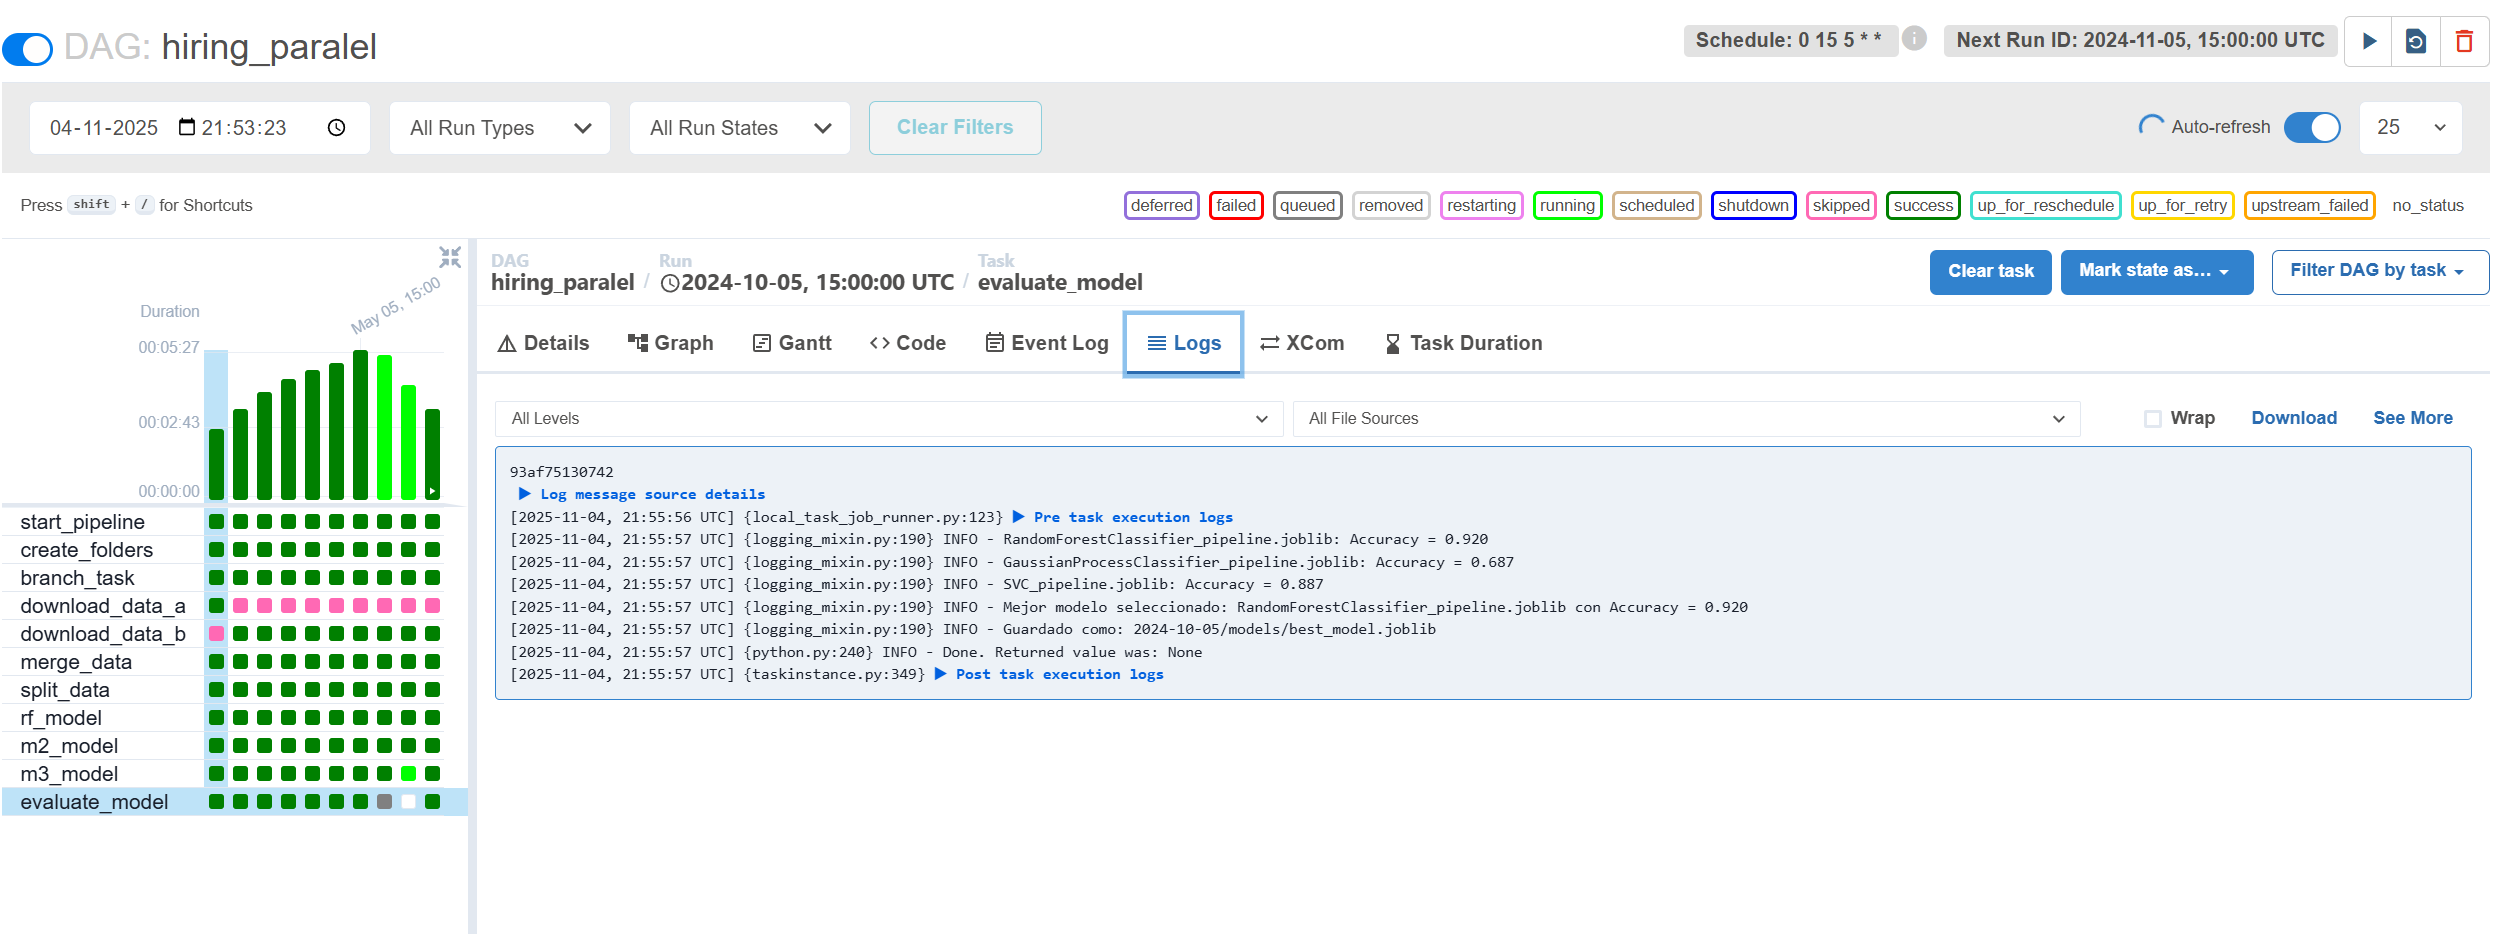


Para Octubre:
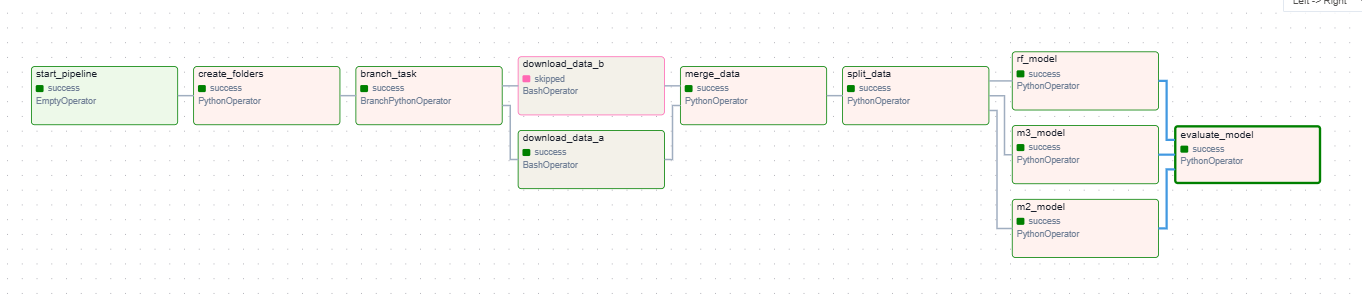

GaussianProcessClassifier_pipeline.joblib: Accuracy = 0.687
SVC_pipeline.joblib: Accuracy = 0.887
RandomForestClassifier_pipeline.joblib: Accuracy = 0.920


Para Nombiembre:
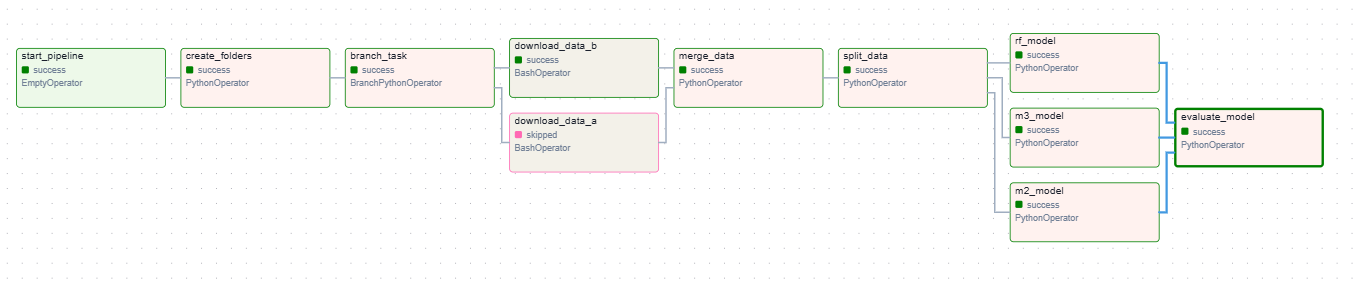

GaussianProcessClassifier_pipeline.joblib: Accuracy = 0.890
SVC_pipeline.joblib: Accuracy = 0.883
RandomForestClassifier_pipeline.joblib: Accuracy = 0.923




In [ ]:
#Inserte código aqui

# Conclusión

Éxito!
<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1000/1*PX8WVijZapo7EDrvGv9Inw.gif" width="500">
</div>
